In [8]:
import pandas as pd
import numpy as np
from optimize import curve_fit as ocurve_fit
from scipy.special import expit
from scipy.optimize import minimize
import json

In [9]:
spectra = pd.read_csv("spectra.dat", sep="\t")

In [10]:
spectra_data = spectra[1:]
spectra_data = spectra_data.astype(float)
spectra_data

,Lambda,440,470,495,530,595,634,660,684,branco,full
1,194.152420,0.011534,0.007311,0.008760,0.009653,0.010221,0.006451,0.005752,0.003734,0.018989,0.010652
2,194.354370,-0.000009,0.000591,0.000111,0.000858,0.001224,0.001125,0.001836,0.001697,0.009667,0.005833
3,194.556335,0.000103,0.001438,0.002259,0.001650,0.000233,-0.000425,-0.000221,0.003679,0.009298,0.005016
4,194.758316,-0.001900,0.000816,0.001665,0.000688,0.000460,0.001012,-0.002362,0.003790,0.009440,0.005072
5,194.960327,0.003095,0.001776,0.006867,0.005864,0.004506,0.003886,0.005329,0.005074,0.015436,0.008736
...,...,...,...,...,...,...,...,...,...,...,...
3644,1013.778564,-0.012484,-0.014289,-0.014249,-0.016394,-0.013914,-0.011274,-0.008560,-0.003437,-0.020287,-0.012906
3645,1014.019653,-0.014234,-0.015080,-0.015267,-0.017638,-0.017082,-0.012570,-0.009095,-0.003604,-0.020741,-0.014738
3646,1014.260681,-0.011892,-0.015108,-0.013768,-0.015404,-0.015696,-0.010964,-0.008672,-0.003799,-0.021708,-0.012822
3647,1014.501709,-0.015900,-0.014826,-0.016030,-0.016705,-0.018893,-0.010598,-0.011011,-0.002907,-0.021424,-0.016063


In [11]:
#irrad = pd.read_csv("irradiancia.dat", sep="\t")

In [12]:
#irrad.iloc[4,1::2]

In [13]:
irrad = {}
with open("irradiancia2.json") as jfile:
    irrad = json.load(jfile)

In [14]:
#Getting Actual areas

In [15]:
#A = irrad.iloc[4,1::2].astype(float)
A = pd.Series(irrad).astype(float)
A

branco    13.0
full      13.0
440        8.0
470        7.0
495        6.0
530        5.0
595        2.0
634        5.0
660        5.0
684        8.0
dtype: float64

Calculating Integrals and Normalizing
=====================================

In [16]:
y_labels = spectra_data.columns[1:]
x_label = "Lambda"

In [17]:
A_star = {} #Integrals for the spectra in arbitrary units

In [18]:
for label in y_labels:
    A_star[label] = np.trapz(spectra_data[label], x=spectra_data[x_label])

In [19]:
pd.Series(A_star)

440        13.289713
470        18.925137
495        18.771848
530        30.994957
595        16.052588
634        18.381114
660        18.729419
684        27.182472
branco    103.859368
full       88.305570
dtype: float64

In [20]:
#Making branco=avg(branco1, branco2)

In [21]:
#A["branco"] = 0.5*(A["branco1"]+A["branco2"])

In [22]:
#A = A[2:] #Removing branco1 and branco2
#A

In [23]:
normalized_data = (spectra_data.iloc[:,1:]/A_star)*A

In [24]:
normalized_data[x_label] = spectra_data[x_label]

In [25]:
normalized_data

,440,470,495,530,595,634,660,684,branco,full,Lambda
1,0.006943,0.002704,0.002800,0.001557,0.001273,0.001755,0.001535,0.001099,0.002377,0.001568,194.152420
2,-0.000006,0.000218,0.000035,0.000138,0.000152,0.000306,0.000490,0.000500,0.001210,0.000859,194.354370
3,0.000062,0.000532,0.000722,0.000266,0.000029,-0.000116,-0.000059,0.001083,0.001164,0.000738,194.556335
4,-0.001144,0.000302,0.000532,0.000111,0.000057,0.000275,-0.000630,0.001115,0.001182,0.000747,194.758316
5,0.001863,0.000657,0.002195,0.000946,0.000561,0.001057,0.001423,0.001493,0.001932,0.001286,194.960327
...,...,...,...,...,...,...,...,...,...,...,...
3644,-0.007515,-0.005285,-0.004554,-0.002645,-0.001733,-0.003067,-0.002285,-0.001011,-0.002539,-0.001900,1013.778564
3645,-0.008569,-0.005578,-0.004880,-0.002845,-0.002128,-0.003419,-0.002428,-0.001061,-0.002596,-0.002170,1014.019653
3646,-0.007158,-0.005588,-0.004401,-0.002485,-0.001956,-0.002982,-0.002315,-0.001118,-0.002717,-0.001888,1014.260681
3647,-0.009571,-0.005484,-0.005124,-0.002695,-0.002354,-0.002883,-0.002939,-0.000855,-0.002682,-0.002365,1014.501709


In [26]:
#Checking results

In [27]:
sanity_check = {}
for label in y_labels:
    sanity_check[label] = np.trapz(normalized_data[label], x=normalized_data[x_label])

In [28]:
pd.concat([pd.Series(sanity_check), A], axis=1, sort=True)

,0,1
440,8.0,8.0
470,7.0,7.0
495,6.0,6.0
530,5.0,5.0
595,2.0,2.0
634,5.0,5.0
660,5.0,5.0
684,8.0,8.0
branco,13.0,13.0
full,13.0,13.0


In [29]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 5]

In [30]:
import plotly.express as px

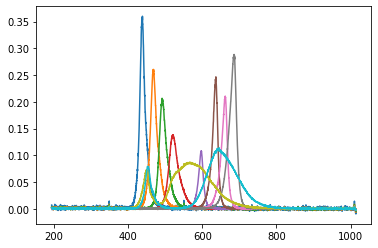

In [31]:
plt.plot(normalized_data[x_label],normalized_data[y_labels])

Fitting Data to Theoretical Curve
=================================

In [32]:
"""
y(x)=f*((2*A/(pi*2*b/(1+exp(c*(x-x0)))))/(1+4*((x-x0)/(2*b/(1+exp(c*(x-x0)))))^2))+(1-f)*(A/(2*b/(1+exp(c*(x-x0)))))*(4*ln(2)/pi)*exp(-4*ln(2)*((x-x0)/(2*b/(1+exp(c*(x-x0)))))^2)

parametros A,b,c,f,x0
"""

'\ny(x)=f*((2*A/(pi*2*b/(1+exp(c*(x-x0)))))/(1+4*((x-x0)/(2*b/(1+exp(c*(x-x0)))))^2))+(1-f)*(A/(2*b/(1+exp(c*(x-x0)))))*(4*ln(2)/pi)*exp(-4*ln(2)*((x-x0)/(2*b/(1+exp(c*(x-x0)))))^2)\n\nparametros A,b,c,f,x0\n'

In [33]:
def G(x,A,b,c,f,x0): return f*((2*A/(np.pi*2*b/(1+np.exp(c*(x-x0)))))/(1+4*((x-x0)/(2*b/(1+np.exp(c*(x-x0)))))**2))+(1-f)*(A/(2*b/(1+np.exp(c*(x-x0)))))*(4*np.log(2)/np.pi)*np.exp(-4*np.log(2)*((x-x0)/(2*b/(1+np.exp(c*(x-x0)))))**2)

In [34]:
def H(x,A0,A1,b0,b1,c0,c1,f0,f1,x00,x01): return G(x,A0,b0,c0,f0,x00) + G(x,A1,b1,c1,f1,x01)

In [35]:
from scipy.optimize import curve_fit

In [36]:
#Testing

In [37]:
param, cov = curve_fit(G,normalized_data[x_label],normalized_data["440"], p0=[1.0,100.0,0.0001,100.0,440], method="lm")

In [38]:
A,b,c,f,x0 = param

In [39]:
x = np.linspace(0,1000,1000)

In [40]:
y = G(x,A,b,c,f,x0)

In [41]:
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected = True)
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "iframe"

data = [go.Scatter(x=x,y=y), go.Line(x=normalized_data[x_label], y=normalized_data["440"])]

plot(data)

/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




'temp-plot.html'

In [42]:
#Fitting curves

In [43]:
parameters = {}

In [44]:
p0 = {
    "440":[1.0,100.0,1e-10,0.5,440],
    "470":[1.0,100.0,1e-10,0.5,440],
    "495":[1.0,100.0,1e-10,0.5,495],
    "530":[1.0,100.0,1e-10,0.5,530],
    "595":[1.0,100.0,1e-10,0.5,595],
    "634":[1.0,100.0,1e-10,0.5,634],
    "660":[1.0,100.0,1e-10,0.5,660],
    "684":[100.0,100.0,1,0,686],
    "branco":[1.0,1.0,1.0,1.0,1e-10,1e-10,0,0,450,550],
    "full":[1.0,1.0,1.0,1.0,0,0,0,0,450,650]
}

In [45]:
for label in y_labels:
    print(label)
    if label!="branco" and label!="full" and label!="684":
        try:
            bounds = [[-np.inf,-np.inf,-np.inf,0,-np.inf],[np.inf,np.inf,np.inf,1,np.inf]]
            param, cov = curve_fit(G, normalized_data[x_label], normalized_data[label], p0=p0[label], method="trf", bounds=bounds)
            parameters[label] = param
        except RuntimeError:
            print("RuntimeError", label)
    elif label=="684":
        def wrap684(x,*param):
            param = list(param)
            param[3] = expit(param[3])
            return G(x,*param)
        #parameters[label] = ocurve_fit(wrap684, normalized_data[x_label], normalized_data[label], p0[label])["x"]
        parameters[label] = curve_fit(wrap684, normalized_data[x_label], normalized_data[label], p0[label])[0]
        parameters[label][3] = expit(parameters[label][3])
        
    else:
        bounds = [[-np.inf for i in range(10)],[np.inf for i in range(10)]]
        bounds[0][6] = 0
        bounds[1][6] = 1
        bounds[0][7] = 0
        bounds[1][7] = 1
        param, cov = curve_fit(H, normalized_data[x_label], normalized_data[label], p0=p0[label], method="trf", bounds=bounds)
        parameters[label] = param

440
470
495
530
595
634
660
684
branco
full


In [76]:
parameters.keys()

dict_keys(['440', '470', '495', '530', '595', '634', '660', '684', 'branco', 'full'])

In [47]:
for label in y_labels:
    plt.figure(label)
    if label!="branco" and label!="full":
        y = G(x,*parameters[label])
    else:
        y = H(x,*parameters[label])
    data = [go.Scatter(x=x,y=y), go.Line(x=normalized_data[x_label], y=normalized_data[label])]
    fig = go.Figure(data)
    plot(fig, filename=f"plots/curve_fit_{label}.html")
    """
    plt.scatter(normalized_data[x_label],normalized_data[label])
    plt.plot(x,y)
    plt.savefig(f"plots/curve_fit_{label}.png")
    plt.clf()
    """

/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.


/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.


/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.


/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [48]:
import json

In [49]:
p = {}
for label, value in parameters.items():
    p[label] = value.tolist()
p["header"] = ["A0","A1","b0","b1","c0","c1","f0","f1","x00","x01"]

In [50]:
with open("parameters.json", "w") as f:
    json.dump(p,f)

Generator set
=============

In [51]:
sorted_parameters = sorted(parameters.items(),key=lambda x: x[0]) #Choosing ordering to make sure the parameters don't get scrambled later

In [52]:
def LinearCombination(x,alpha):
    """
    alpha: Array of values for the coefficients of the linear combination. Must be within the interval [0,1]
    """
    assert max(alpha)<=1 and min(alpha)>=0
    s = 0
    for d,a in zip(sorted_parameters,alpha):
        if d[0]=="branco" or d[0]=="full":
            s+=a*H(x,*d[1])
        else:
            s+=a*G(x,*d[1])
    return s

    

In [53]:
a = [np.abs(np.random.random()) for e in parameters.keys()]
LinearCombination(0,a)

0.00010803138947874289

<h2>Uniform spectrum</h2>

In [54]:
x = np.linspace(0,1000,100)

In [55]:
L = max(LinearCombination(x,[1 for i in parameters.keys()]))

In [56]:
#y_uniform = [L/2]*len(x)
y_uniform = lambda l: l*(np.heaviside(x-400,0)-np.heaviside(x-700,0))

In [57]:
LinearCombination(0,[1,1,1,1,1,1,1,.6,1])

0.00016958307730729523

In [58]:
def wrapLinearCombination(x,alpha):
    #Mapping parameters to [0,1]
    nalpha = expit(alpha)
    return LinearCombination(x,nalpha)

In [59]:
uniform_fit = ocurve_fit(wrapLinearCombination,x,y_uniform(L/4),[0]*len(parameters.keys()))

In [60]:
expit(uniform_fit["x"])

array([0.25562753, 0.31970861, 0.39992645, 0.33635061, 0.23796888,
       0.15699743, 0.21770274, 0.31430342, 0.99998601, 0.27923374])

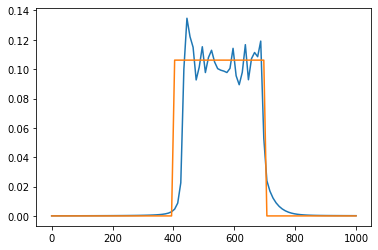

In [61]:
plt.figure(0)
plt.plot(x,wrapLinearCombination(x,uniform_fit["x"]))
plt.plot(x,y_uniform(L/4))

In [62]:
def fit(l):
    ofit = ocurve_fit(wrapLinearCombination,x,y_uniform(l),[0]*len(parameters.keys()))
    return ofit["fun"] + (L-l)

In [63]:
best_l_fit = minimize(fit,L)

In [64]:
best_l_fit

      fun: 0.34780360561843804
 hess_inv: array([[0.09544723]])
      jac: array([0.00471471])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 67
      nit: 1
     njev: 19
   status: 2
  success: False
        x: array([0.13738098])

In [65]:
uniform_fit = ocurve_fit(wrapLinearCombination,x,y_uniform(best_l_fit["x"]),[0]*len(parameters.keys()))

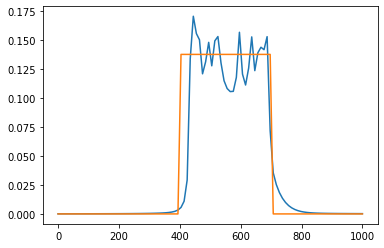

In [66]:
plt.figure(0)
plt.plot(x,wrapLinearCombination(x,uniform_fit["x"]))
plt.plot(x,y_uniform(best_l_fit["x"]))

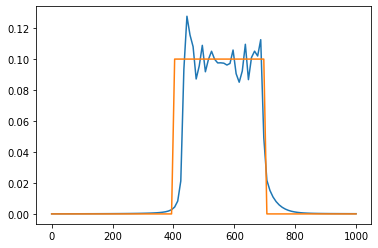

In [73]:
h = 0.1
uniform_fit = ocurve_fit(wrapLinearCombination,x,y_uniform(h),[0]*len(parameters.keys()))
plt.figure(0)
plt.plot(x,wrapLinearCombination(x,uniform_fit["x"]))
plt.plot(x,y_uniform(h))

In [74]:
neutral_spectrum_components  = expit(uniform_fit["x"])
neutral_spectrum_components

array([0.23459968, 0.30099616, 0.37546772, 0.28211687, 0.17609814,
       0.14904441, 0.2145333 , 0.30246413, 0.99995375, 0.23291515])

In [80]:
with open("neutral_spectrum_components.json","w") as f:
    json.dump({"coefficients":dict(zip(parameters.keys(),neutral_spectrum_components.tolist()))},f)

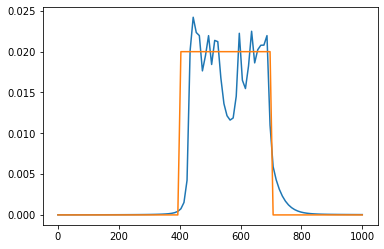

In [70]:
u = 0.1
plt.figure(0)
plt.plot(x,LinearCombination(x,u*neutral_spectrum_components))
plt.plot(x,u*y_uniform(h))

In [81]:
sorted(neutral_spectrum_components.tolist())

[0.1490444072029084,
 0.17609814440797206,
 0.2145333049075533,
 0.23291515239948163,
 0.2345996831531853,
 0.28211687274917013,
 0.3009961550222661,
 0.30246412667317074,
 0.37546771741691637,
 0.9999537477523128]